In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
df = pd.read_csv('/content/sample_data/BTC-USD.csv')
df = df[["Date", "Close"]]
df.columns = ["ds", "y"]
print(df)

             ds             y
0    2020-07-12   9276.500000
1    2020-07-13   9243.614258
2    2020-07-14   9243.213867
3    2020-07-15   9192.836914
4    2020-07-16   9132.227539
..          ...           ...
361  2021-07-08  32877.371094
362  2021-07-09  33798.011719
363  2021-07-10  33520.519531
364  2021-07-11  34240.187500
365  2021-07-12  33230.804688

[366 rows x 2 columns]


In [3]:
prophet = Prophet()
prophet.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [4]:
future = prophet.make_future_dataframe(periods=365)
print(future)

            ds
0   2020-07-12
1   2020-07-13
2   2020-07-14
3   2020-07-15
4   2020-07-16
..         ...
726 2022-07-08
727 2022-07-09
728 2022-07-10
729 2022-07-11
730 2022-07-12

[731 rows x 1 columns]


In [5]:
forecast = prophet.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(200)

,ds,yhat,yhat_lower,yhat_upper
531,2021-12-25,-24601.863384,-45698.034657,-1894.166479
532,2021-12-26,-25001.185854,-46508.918222,-2948.743905
533,2021-12-27,-25293.878798,-46972.152681,-850.722854
534,2021-12-28,-25635.684926,-48011.263422,-2210.058174
535,2021-12-29,-25934.314793,-48794.620702,-714.798403
...,...,...,...,...
726,2022-07-08,-87433.811055,-152925.590767,-11251.163753
727,2022-07-09,-87747.875716,-151251.821392,-11419.052399
728,2022-07-10,-88147.198187,-152122.736828,-10474.232938
729,2022-07-11,-88439.891131,-153923.584710,-11931.131418


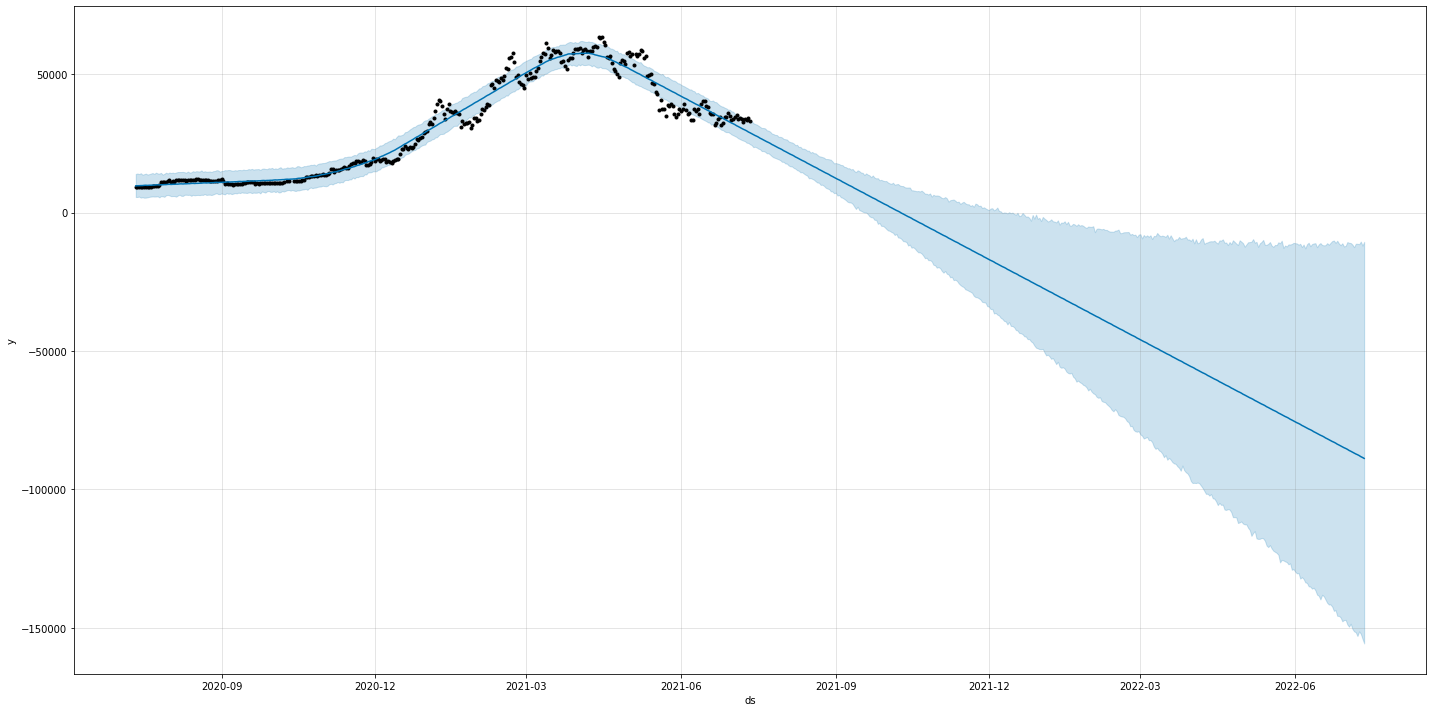

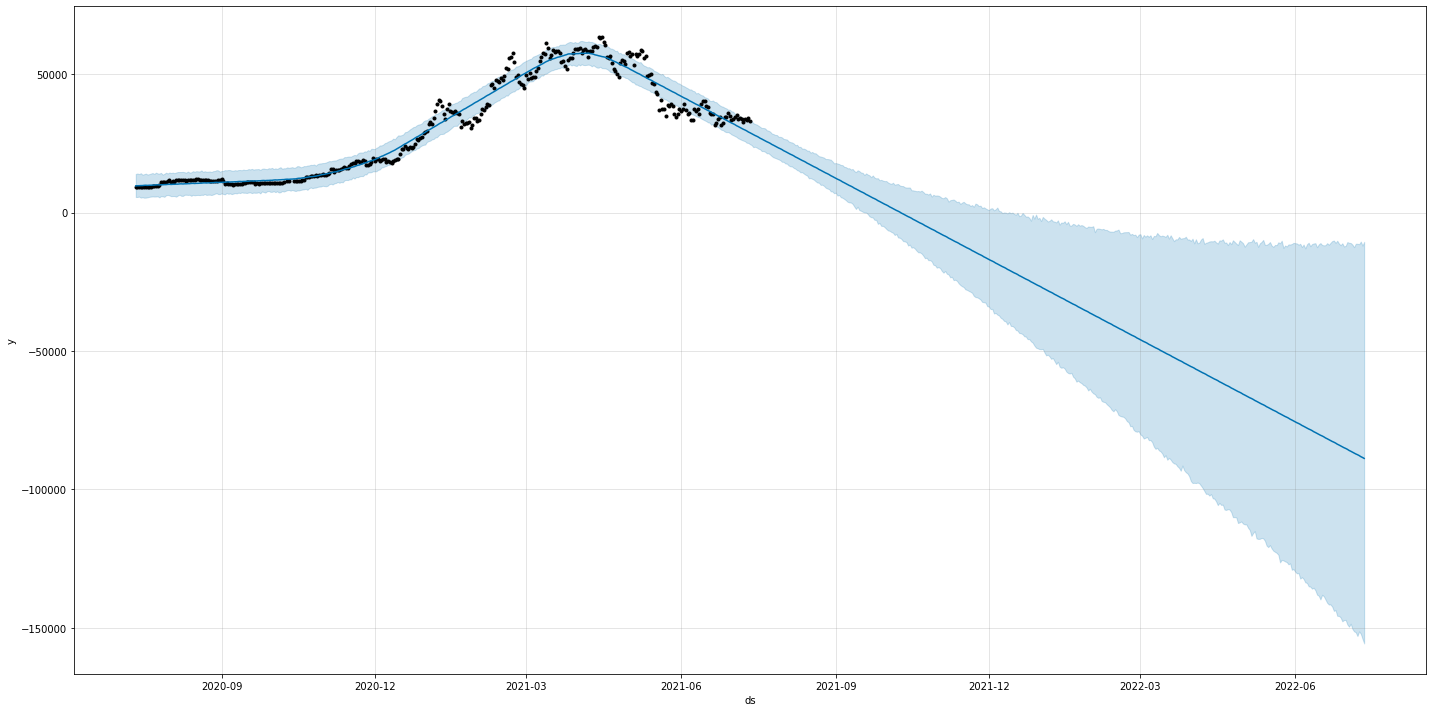

In [6]:
from fbprophet.plot import plot
prophet.plot(forecast, figsize=(20, 10))